In [2]:
# 模型复杂度和训练数据集大小对欠拟合和过拟合的影响
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 多项式函数拟合
# 生成一个人工数据集
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = tf.random.normal(shape=(n_train + n_test, 1))
poly_features = tf.concat([features, tf.pow(features, 2), tf.pow(features, 3)],1)
print(poly_features.shape)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]+ true_w[2] * poly_features[:, 2] + true_b)
print(tf.shape(labels))
labels += tf.random.normal(labels.shape,0,0.1)

(200, 3)
tf.Tensor([200], shape=(1,), dtype=int32)


In [5]:
features[:2], poly_features[:2], labels[:2]

(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[-0.32876372],
        [ 0.933378  ]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[-0.32876372,  0.10808559, -0.03553462],
        [ 0.933378  ,  0.8711945 ,  0.81315374]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.257068, 7.685596], dtype=float32)>)

In [11]:
# 定义、训练和测试模型
# 定义画图函数
from IPython import display
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """Set matplotlib figure size."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    plt.show()

In [9]:

num_epochs, loss = 100, tf.losses.MeanSquaredError()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = tf.keras.Sequential()
    net.add(tf.keras.layers.Dense(1))
    batch_size = min(10, train_labels.shape[0])
    train_iter = tf.data.Dataset.from_tensor_slices(
        (train_features, train_labels)).batch(batch_size)
    test_iter = tf.data.Dataset.from_tensor_slices(
        (test_features, test_labels)).batch(batch_size)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                l = loss(y, net(X))

            grads = tape.gradient(l, net.trainable_variables)
            optimizer.apply_gradients(zip(grads, net.trainable_variables))

        train_ls.append(loss(train_labels, net(train_features)).numpy().mean())
        test_ls.append(loss(test_labels, net(test_features)).numpy().mean())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.get_weights()[0],
          '\nbias:', net.get_weights()[1])


final epoch: train loss 0.008467069 test loss 0.007854569


/tmp/ipykernel_2829/1154807524.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


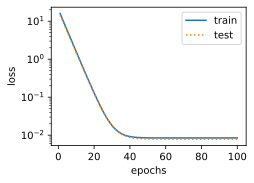

weight: [[ 1.1840752]
 [-3.40106  ]
 [ 5.604005 ]] 
bias: [5.003382]


In [10]:
# 三阶多项式函数拟合（正常）
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])


final epoch: train loss 257.3448 test loss 201.65411


/tmp/ipykernel_2829/1593140.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


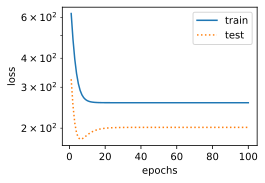

weight: [[22.40101]] 
bias: [1.201964]


In [12]:
# 线性函数拟合（欠拟合）
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])


final epoch: train loss 0.26781863 test loss 329.97327


/tmp/ipykernel_2829/1593140.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


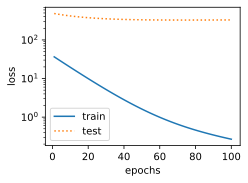

weight: [[1.1387208]
 [2.0157945]
 [1.3723627]] 
bias: [3.730725]


In [13]:
# 训练样本不足（过拟合）
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])